In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

'C:\\Users\\satya\\ML Project'

In [3]:
df = pd.read_csv(r'dataset\train.csv', parse_dates = True)

In [4]:
df.head(5)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [5]:
df.isnull().sum()


beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [6]:
df.shape

(2016, 8)

In [7]:
df1 = df

In [8]:
df1 

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,0.50,acre,98112,910000.0
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.00,sqft,98199,1150000.0
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0


In [9]:
df1['lot_size'] = df1['lot_size'].fillna(6000)


In [10]:
df1['lot_size_units'] = df1['lot_size_units'].fillna(df1['lot_size_units'].mode()[0])


In [11]:
df1['lot_size_units'].unique()

array(['sqft', 'acre'], dtype=object)

In [12]:
df1['size_units'].unique()

array(['sqft'], dtype=object)

In [13]:

df1['lot_size'] = df1.apply(lambda row: row['lot_size'] * 43560 if row['lot_size_units'] == 'acre' else row['lot_size'], axis=1)


In [14]:
df1['price'] = df1.apply(lambda x: x['price'] / 100000, axis=1)


In [15]:
df2 = df1

In [16]:
df2.rename(columns={'size': 'size(in sqft)'}, inplace=True)
df2.rename(columns={'lot_size': 'lot_size(in sqft)'}, inplace=True)
df2.rename(columns={'price': 'price(in lacs)'}, inplace=True)

In [17]:
df2

,beds,baths,size(in sqft),size_units,lot_size(in sqft),lot_size_units,zip_code,price(in lacs)
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,7.95
1,4,2.0,2240.0,sqft,13503.6,acre,98106,9.15
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,9.50
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,19.50
4,2,2.0,1042.0,sqft,6000.0,sqft,98102,9.50
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,21780.0,acre,98112,9.10
2012,1,1.0,889.0,sqft,6000.0,sqft,98121,5.50
2013,4,2.0,2140.0,sqft,6250.0,sqft,98199,11.50
2014,2,2.0,795.0,sqft,6000.0,sqft,98103,5.90


In [18]:
df2.drop(['size_units','lot_size_units'], axis=1, inplace=True)


In [19]:
#INDEPENDENT AND DEPENDENT FEATURES

# First DataFrame with all columns except the last
X = df2.iloc[:, :-1]

# Second DataFrame with only the last column
y = df2.iloc[:, -1]


In [20]:
X


,beds,baths,size(in sqft),lot_size(in sqft),zip_code
0,3,2.5,2590.0,6000.0,98144
1,4,2.0,2240.0,13503.6,98106
2,4,3.0,2040.0,3783.0,98107
3,4,3.0,3800.0,5175.0,98199
4,2,2.0,1042.0,6000.0,98102
...,...,...,...,...,...
2011,3,2.0,1370.0,21780.0,98112
2012,1,1.0,889.0,6000.0,98121
2013,4,2.0,2140.0,6250.0,98199
2014,2,2.0,795.0,6000.0,98103


In [21]:
y

0        7.95
1        9.15
2        9.50
3       19.50
4        9.50
        ...  
2011     9.10
2012     5.50
2013    11.50
2014     5.90
2015     6.59
Name: price(in lacs), Length: 2016, dtype: float64

In [22]:
X['beds'].unique().sum()

74

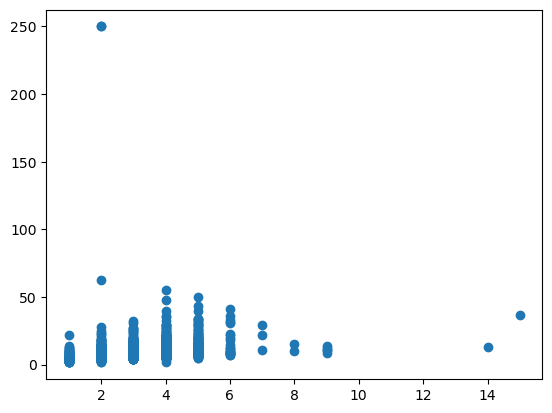

In [23]:
plt.scatter(X['beds'], y)

In [24]:
correlation = X['beds'].corr(y)
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: 0.2935156200327486


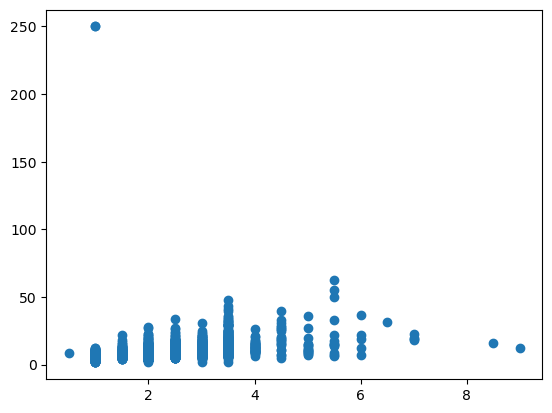

In [25]:
plt.scatter(X['baths'], y)

In [26]:
df2.corr()

,beds,baths,size(in sqft),lot_size(in sqft),zip_code,price(in lacs)
beds,1.000000,0.652853,0.771929,-0.051159,0.077811,0.293516
baths,0.652853,1.000000,0.667655,-0.038675,-0.002679,0.317325
size(in sqft),0.771929,0.667655,1.000000,-0.047801,0.070557,0.444140
lot_size(in sqft),-0.051159,-0.038675,-0.047801,1.000000,-0.023780,-0.025047
zip_code,0.077811,-0.002679,0.070557,-0.023780,1.000000,-0.047189
price(in lacs),0.293516,0.317325,0.444140,-0.025047,-0.047189,1.000000


C:\Users\satya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\satya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\satya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\satya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='price(in lacs)', ylabel='Count'>

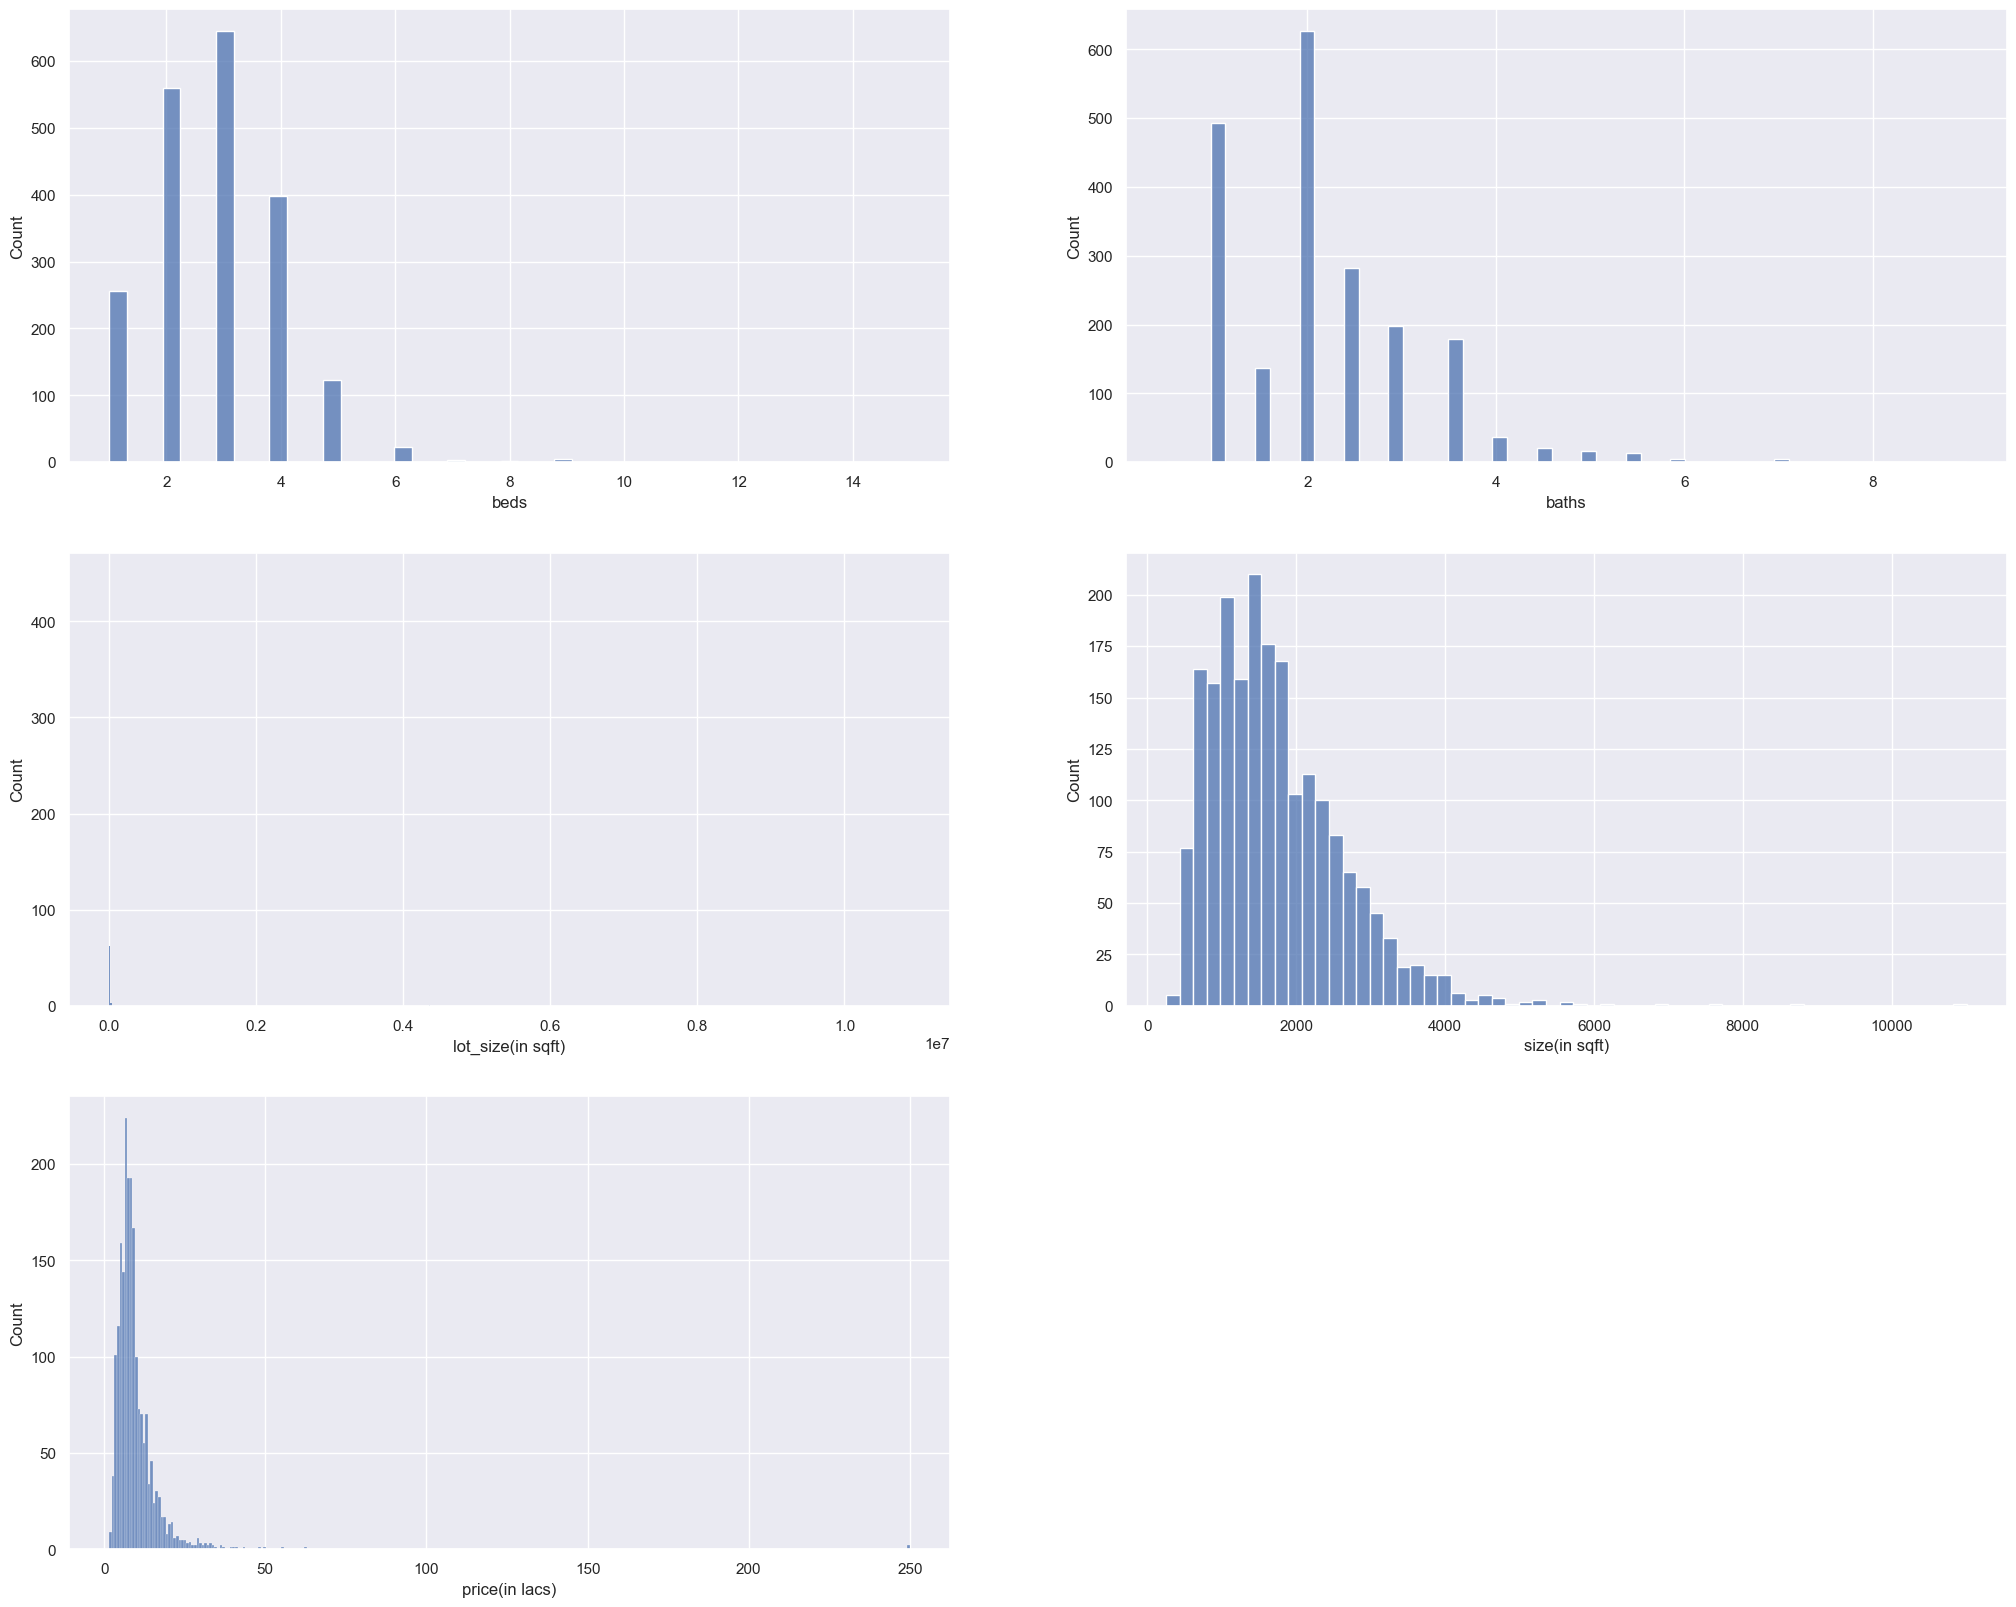

In [27]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.histplot(df2['beds'], kde = False)

plt.subplot(3,2,2)
sns.histplot(df2['baths'], kde = False)

plt.subplot(3,2,3)
sns.histplot(df2['lot_size(in sqft)'], kde = False)

plt.subplot(3,2,4)
sns.histplot(df2['size(in sqft)'], kde = False)

plt.subplot(3,2,5)
sns.histplot(df2['price(in lacs)'], kde = False)

<Axes: xlabel='beds', ylabel='price(in lacs)'>

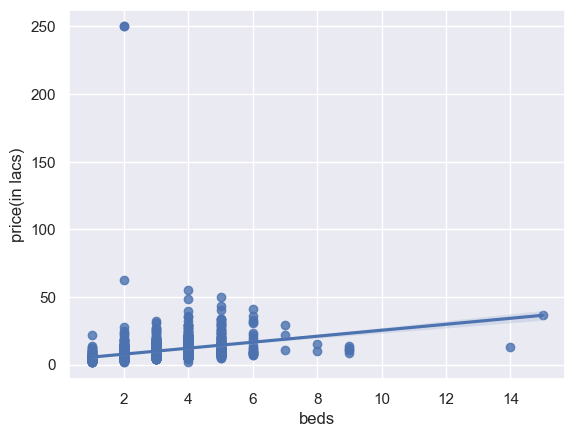

In [28]:
sns.regplot(x = 'beds',y = 'price(in lacs)',data = df2)

<Axes: xlabel='baths', ylabel='price(in lacs)'>

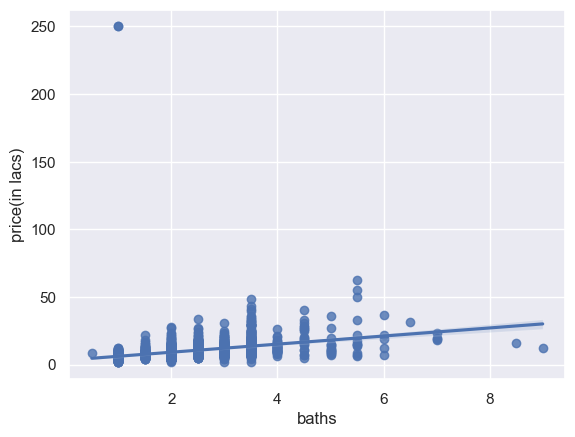

In [29]:
sns.regplot(x = 'baths',y = 'price(in lacs)',data = df2)

<Axes: xlabel='zip_code', ylabel='price(in lacs)'>

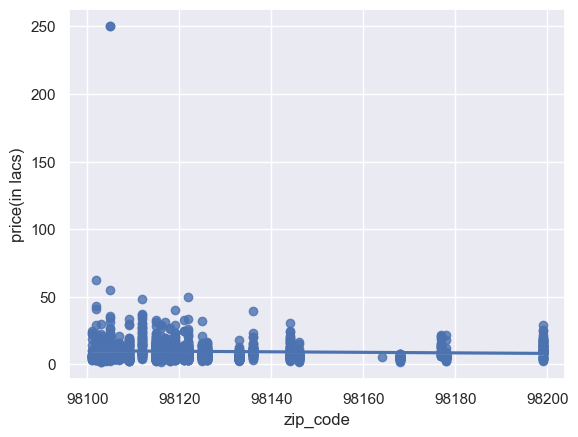

In [30]:
sns.regplot(x = 'zip_code',y = 'price(in lacs)',data = df2)

In [31]:
#Standardise the dataset
#why we stadardise the dataset
#becaause in lin reg we apply graadient descent ... our main aim is to reach the global minima
#so we standardise to make all the independent features to a single scale so that the process becomes faster

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [32]:
X = scalar.fit_transform(X)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [34]:
#print coeff and inteercept
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-1.32604089  0.62075914  4.84638753 -0.06484453 -0.68403598]
9.636252247023759


In [35]:
#ON which parameters the model is trained
print(lin_reg.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [36]:
#Prediction with test dATA
pred = lin_reg.predict(X)

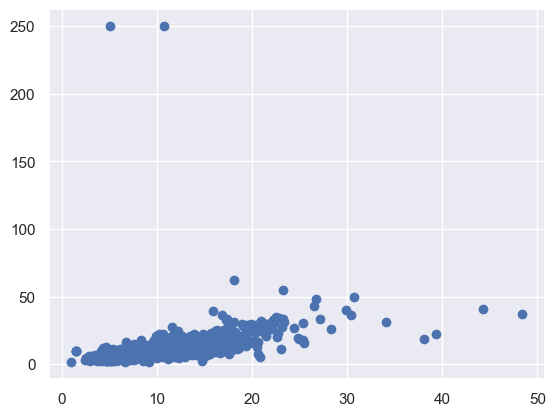

In [37]:
plt.scatter(pred,y)

In [38]:
residual = y-pred

C:\Users\satya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


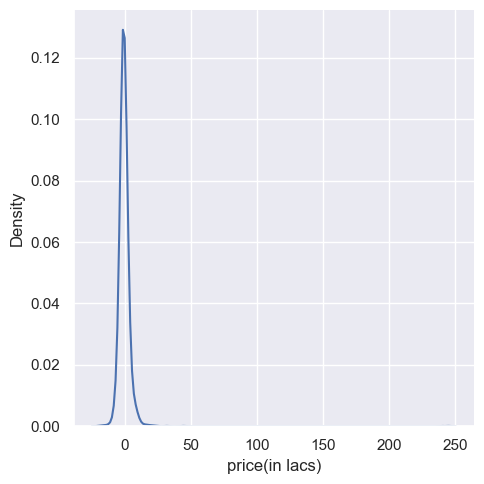

In [39]:
#plot residual-- must be normal distributed
sns.displot(residual,kind = "kde")

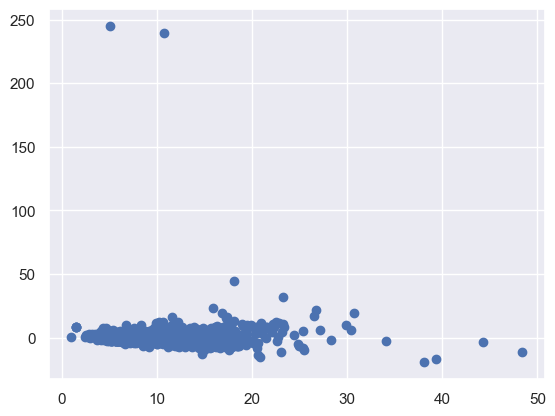

In [40]:
plt.scatter(pred,residual)
#must be uniform distribution

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y,pred)))
print(mean_absolute_error(y,pred))

8.382447330438241
2.541008921703785


In [44]:
df3 = pd.read_csv(r'dataset/test.csv', parse_dates = True)
df3

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0


In [45]:
df3['lot_size'] = df3['lot_size'].fillna(6000)

df3['lot_size'] = df3.apply(lambda row: row['lot_size'] * 43560 if row['lot_size_units'] == 'acre' else row['lot_size'], axis=1)

df3['price'] = df3.apply(lambda x: x['price'] / 100000, axis=1)
df3.drop(['size_units','lot_size_units'], axis=1, inplace=True)

df3.rename(columns={'size': 'size(in sqft)'}, inplace=True)
df3.rename(columns={'lot_size': 'lot_size(in sqft)'}, inplace=True)
df3.rename(columns={'price': 'price(in lacs)'}, inplace=True)


In [46]:
df3

,beds,baths,size(in sqft),lot_size(in sqft),zip_code,price(in lacs)
0,3,3.0,2850.0,4200.0,98119,11.750
1,4,5.0,3040.0,5002.0,98106,10.575
2,3,1.0,1290.0,6048.0,98125,7.990
3,3,2.0,2360.0,12196.8,98188,5.650
4,3,3.5,1942.0,1603.0,98107,11.870
...,...,...,...,...,...,...
500,5,4.5,5580.0,13068.0,98146,38.000
501,3,2.5,1390.0,1570.0,98126,5.750
502,3,2.5,2950.0,20473.2,98118,31.050
503,5,5.0,3010.0,4887.0,98115,18.070


In [47]:
X_test = df3.iloc[:,:-1]
y_test = df3.iloc[:,-1]

In [48]:
X_test

,beds,baths,size(in sqft),lot_size(in sqft),zip_code
0,3,3.0,2850.0,4200.0,98119
1,4,5.0,3040.0,5002.0,98106
2,3,1.0,1290.0,6048.0,98125
3,3,2.0,2360.0,12196.8,98188
4,3,3.5,1942.0,1603.0,98107
...,...,...,...,...,...
500,5,4.5,5580.0,13068.0,98146
501,3,2.5,1390.0,1570.0,98126
502,3,2.5,2950.0,20473.2,98118
503,5,5.0,3010.0,4887.0,98115


In [49]:
y_test

0      11.750
1      10.575
2       7.990
3       5.650
4      11.870
        ...  
500    38.000
501     5.750
502    31.050
503    18.070
504     8.950
Name: price(in lacs), Length: 505, dtype: float64

In [50]:
X_test = scalar.fit_transform(X_test)

In [51]:
pred_test = lin_reg.predict(X_test)

In [52]:
pred_test

array([15.5048598 , 16.99261115,  5.90338098, 10.38606229, 11.37674864,
        5.97694249,  5.83112564, 16.41002479,  8.95684997,  4.92147345,
        9.38613659,  6.58070088, 12.58033833,  8.159872  ,  4.90161823,
       12.81373476, 12.07416466,  8.26653992,  9.27526604, 12.62131456,
        6.31444481, 12.85433488,  9.71899153,  5.01735913,  6.41612977,
        7.63228499,  6.98819462,  7.27024691,  9.21405075,  4.6328491 ,
        5.24728535,  4.85699295, 17.52652871,  4.05819329, 10.97645264,
       10.2322181 ,  4.73227057, 11.54269201, 11.60534803, 14.80158254,
       15.72331179,  7.41742097, 17.86153098, 11.13520301, 18.67304668,
       16.86525303, 11.03996151,  9.68951896, 12.55807259,  6.14376676,
        7.52621149,  4.37735962,  5.27314467, 10.2735283 ,  6.15876713,
        4.97367689, 12.70712676,  8.37077675,  8.11439699,  8.91993535,
        7.10413766,  5.9022786 ,  9.80908204,  8.87062113, 15.94402651,
        6.60543238,  6.91384415,  6.71113579,  3.61155885,  7.53

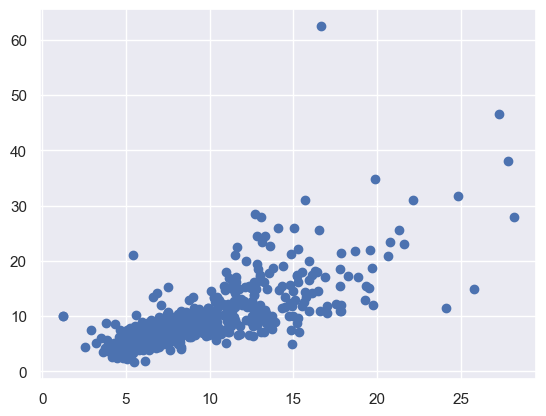

In [53]:
plt.scatter(pred_test,y_test)


In [54]:
residual_pred = y_test - pred_test

In [55]:
print(np.mean(residual_pred))

0.1595693965404267


PICKLING THE MODEL

In [56]:
import pickle

In [58]:
pickle.dump(lin_reg,open('model.pkl','wb'))

In [59]:
pickled = pickle.load(open('model.pkl','rb'))

In [60]:
pickled.predict(X_test)

array([15.5048598 , 16.99261115,  5.90338098, 10.38606229, 11.37674864,
        5.97694249,  5.83112564, 16.41002479,  8.95684997,  4.92147345,
        9.38613659,  6.58070088, 12.58033833,  8.159872  ,  4.90161823,
       12.81373476, 12.07416466,  8.26653992,  9.27526604, 12.62131456,
        6.31444481, 12.85433488,  9.71899153,  5.01735913,  6.41612977,
        7.63228499,  6.98819462,  7.27024691,  9.21405075,  4.6328491 ,
        5.24728535,  4.85699295, 17.52652871,  4.05819329, 10.97645264,
       10.2322181 ,  4.73227057, 11.54269201, 11.60534803, 14.80158254,
       15.72331179,  7.41742097, 17.86153098, 11.13520301, 18.67304668,
       16.86525303, 11.03996151,  9.68951896, 12.55807259,  6.14376676,
        7.52621149,  4.37735962,  5.27314467, 10.2735283 ,  6.15876713,
        4.97367689, 12.70712676,  8.37077675,  8.11439699,  8.91993535,
        7.10413766,  5.9022786 ,  9.80908204,  8.87062113, 15.94402651,
        6.60543238,  6.91384415,  6.71113579,  3.61155885,  7.53